In [1]:
pip install openpyxl==3.0.0

In [2]:
#import necessary libraries
import numpy as np
import pandas as pd
import sklearn as sk
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes as nb
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn import svm
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier as RFC

import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_excel('drive/MyDrive/Colab Notebooks/XL Data.xlsx', sheet_name = 'Main Data')

In [5]:
features = ['VAR_1', 'VAR_2', 'VAR_3', 'VAR_4', 'VAR_5',
       'VAR_6', 'VAR_7', 'VAR_8', 'VAR_9', 'VAR_10', 'VAR_11', 'VAR_12',
       'VAR_13', 'VAR_14', 'VAR_15', 'VAR_16', 'VAR_17', 'VAR_18', 'VAR_19',
       'VAR_20']

target = 'Response'

treatment = 'Treatment'
df = df[features+[treatment, target]]

In [6]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [7]:
train.to_csv('drive/MyDrive/Colab Notebooks/train_data.csv', index=False)

In [8]:
test.to_csv('drive/MyDrive/Colab Notebooks/test_data.csv',index=False)

In [9]:
# A function to calculate the IRR and NIR
def score(df, promo_pred_col = 'Treatment'):
    n_treat       = df.loc[df[promo_pred_col] == 1,:].shape[0]  # Total number of people treated (given promotion)
    n_control     = df.loc[df[promo_pred_col] == 0,:].shape[0] # Total number of people not given any treatment
    n_treat_purch = df.loc[df[promo_pred_col] == 1, 'Response'].sum() # Total number of people who were given treatment and bought the product
    n_ctrl_purch  = df.loc[df[promo_pred_col] == 0, 'Response'].sum()  #Total number of people who were not given the treatment and bought the product
    irr = n_treat_purch / n_treat - n_ctrl_purch / n_control
    nir = 10 * n_treat_purch - 0.15 * n_treat - 10 * n_ctrl_purch
    return (irr, nir)

In [10]:
# A function to test IRR and NIR on the test set
def test_results(promotion_strategy):
    df =  pd.read_csv('drive/MyDrive/Colab Notebooks/test_data.csv') # Read the test data file
    df = test_data[['VAR_1', 'VAR_2', 'VAR_3', 'VAR_4', 'VAR_5',
       'VAR_6', 'VAR_7', 'VAR_8', 'VAR_9', 'VAR_10', 'VAR_11', 'VAR_12',
       'VAR_13', 'VAR_14', 'VAR_15', 'VAR_16', 'VAR_17', 'VAR_18', 'VAR_19',
       'VAR_20']]
    promos = promotion_strategy(df)
    score_df = test_data.iloc[np.where(promos == 1)]
    irr, nir = score(score_df)
    print('Your irr with this strategy is {:0.4f}.'.format(irr))
    print()
    print('Your nir with this strategy is {:0.2f}.'.format(nir))
    print()
    print("Telecoms corp's baseline model had an irr of {} and an nir of {} on the test set.".format(0.0188, 189.45))
    print()
    return irr, nir

In [11]:
# Added this function to test our IRR and NIR on the validation set
def valid_results(promotion_strategy, valid_data):
    df = valid_data[['VAR_1', 'VAR_2', 'VAR_3', 'VAR_4', 'VAR_5',
       'VAR_6', 'VAR_7', 'VAR_8', 'VAR_9', 'VAR_10', 'VAR_11', 'VAR_12',
       'VAR_13', 'VAR_14', 'VAR_15', 'VAR_16', 'VAR_17', 'VAR_18', 'VAR_19',
       'VAR_20']]
    promos = promotion_strategy(df)
    score_df = valid_data.iloc[np.where(promos == 1)]    
    irr, nir = score(score_df)
    print('Your irr with this strategy is {:0.4f}.'.format(irr))
    print()
    print('Your nir with this strategy is {:0.2f}.'.format(nir))
    
    print("Telecoms corps baseline model had an irr of {} and an nir of {} on the test set.".format(0.0188, 189.45))
    return irr, nir

In [12]:
train_data = pd.read_csv('drive/MyDrive/Colab Notebooks/train_data.csv')  # Read training data file
train_data[train_data['Response'] == 1]

,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,VAR_11,VAR_12,VAR_13,VAR_14,VAR_15,VAR_16,VAR_17,VAR_18,VAR_19,VAR_20,Treatment,Response
1,0.425480,0.323984,0.024392,0.479784,0.569530,0.868371,1,0.977735,0.159405,1,0.335243,0.721150,0.609608,0.808537,0.779295,0.357123,0.339322,0.977163,0.811942,0,0,1
5,0.145939,0.304736,0.755099,0.336596,0.408732,0.393444,1,0.520765,0.141505,0,0.656194,0.976803,0.791383,0.124519,0.480439,0.163638,0.079102,0.479142,0.691237,1,1,1
7,0.447138,0.218195,0.605748,0.270299,0.411240,0.343267,1,0.685207,0.416589,0,0.031726,0.260514,0.477133,0.102071,0.399798,0.218594,0.064004,0.378595,0.231202,1,0,1
17,0.081799,0.628559,0.506974,0.501315,0.632877,0.359665,1,0.903489,0.595778,0,0.832879,0.413163,0.762069,0.013427,0.043984,0.317486,0.904306,0.796326,0.015254,0,1,1
22,0.278423,0.088732,0.029403,0.488508,0.515740,0.415449,0,0.120918,0.308028,1,0.669242,0.830417,0.250299,0.334183,0.438391,0.114177,0.510515,0.024252,0.178255,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3959,0.807344,0.754828,0.976256,0.542493,0.423010,0.511543,1,0.960524,0.463487,0,0.840896,0.258191,0.854295,0.292729,0.072913,0.416074,0.311932,0.236801,0.085212,0,1,1
3976,0.586531,0.359776,0.995434,0.559901,0.563890,0.544068,1,0.644144,0.418398,0,0.581913,0.575170,0.163859,0.617241,0.561079,0.158652,0.064619,0.320323,0.359844,1,0,1
3978,0.979226,0.791171,0.769909,0.308093,0.811650,0.443794,1,0.890528,0.508294,0,0.757610,0.698009,0.639361,0.751903,0.511342,0.908829,0.242429,0.993044,0.275612,1,0,1
3990,0.108973,0.397247,0.510453,0.414561,0.674852,0.831127,1,0.586592,0.490219,0,0.209822,0.730467,0.236910,0.796745,0.339885,0.454791,0.954342,0.414473,0.925645,0,1,1


In [13]:
# Check number of missing values per column
train_data.isnull().mean()

VAR_1        0.0
VAR_2        0.0
VAR_3        0.0
VAR_4        0.0
VAR_5        0.0
VAR_6        0.0
VAR_7        0.0
VAR_8        0.0
VAR_9        0.0
VAR_10       0.0
VAR_11       0.0
VAR_12       0.0
VAR_13       0.0
VAR_14       0.0
VAR_15       0.0
VAR_16       0.0
VAR_17       0.0
VAR_18       0.0
VAR_19       0.0
VAR_20       0.0
Treatment    0.0
Response     0.0
dtype: float64

In [14]:
test_data =  pd.read_csv('drive/MyDrive/Colab Notebooks/test_data.csv') # Read the test data file
test_data

,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,VAR_11,VAR_12,VAR_13,VAR_14,VAR_15,VAR_16,VAR_17,VAR_18,VAR_19,VAR_20,Treatment,Response
0,0.731964,0.650948,0.862505,0.623574,0.664703,0.823695,1,0.413564,0.058211,0,0.602971,0.790230,0.931078,0.354773,0.356037,0.399178,0.741674,0.451390,0.945326,0,1,0
1,0.321621,0.329464,0.948055,0.456419,0.733360,0.504594,0,0.400445,0.224303,0,0.122596,0.989740,0.006237,0.514711,0.099392,0.127896,0.513914,0.727016,0.927689,1,1,0
2,0.280819,0.470046,0.909521,0.688162,0.341352,0.106601,0,0.935463,0.862067,1,0.040708,0.807005,0.791566,0.467652,0.288282,0.387248,0.094154,0.532549,0.264334,0,1,1
3,0.715396,0.318412,0.332842,0.219133,0.640097,0.254051,1,0.462743,0.321278,1,0.302091,0.450263,0.353449,0.087760,0.475170,0.143198,0.357265,0.951959,0.421742,0,1,0
4,0.406659,0.391081,0.525314,0.518497,0.623994,0.216012,1,0.428368,0.367148,0,0.713560,0.079239,0.944309,0.427056,0.203785,0.865163,0.639725,0.762870,0.239617,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.280994,0.834762,0.761961,0.679251,0.243643,0.925944,0,0.632677,0.482703,0,0.753463,0.606945,0.287022,0.172264,0.448227,0.483913,0.313525,0.355177,0.725251,0,1,1
996,0.260435,0.026493,0.921221,0.660229,0.209014,0.127724,0,0.926520,0.501588,1,0.121636,0.946372,0.824303,0.814683,0.731235,0.674666,0.231038,0.280514,0.676319,0,1,0
997,0.353557,0.168535,0.021960,0.020937,0.813046,0.636693,0,0.338364,0.152483,0,0.424412,0.349715,0.100524,0.183937,0.058533,0.905314,0.754487,0.798722,0.335559,0,0,0
998,0.599299,0.012343,0.126314,0.114084,0.745394,0.896842,1,0.563594,0.447290,0,0.723409,0.473444,0.130889,0.086951,0.258778,0.050623,0.214691,0.116398,0.460779,1,1,0


In [15]:
features = ['VAR_1', 'VAR_2', 'VAR_3', 'VAR_4', 'VAR_5',
       'VAR_6', 'VAR_7', 'VAR_8', 'VAR_9', 'VAR_10', 'VAR_11', 'VAR_12',
       'VAR_13', 'VAR_14', 'VAR_15', 'VAR_16', 'VAR_17', 'VAR_18', 'VAR_19',
       'VAR_20']

In [16]:
train_data['Treatment'].value_counts()

1    3161
0     839
Name: Treatment, dtype: int64

In [17]:
train_data['Response'].value_counts()

0    3361
1     639
Name: Response, dtype: int64

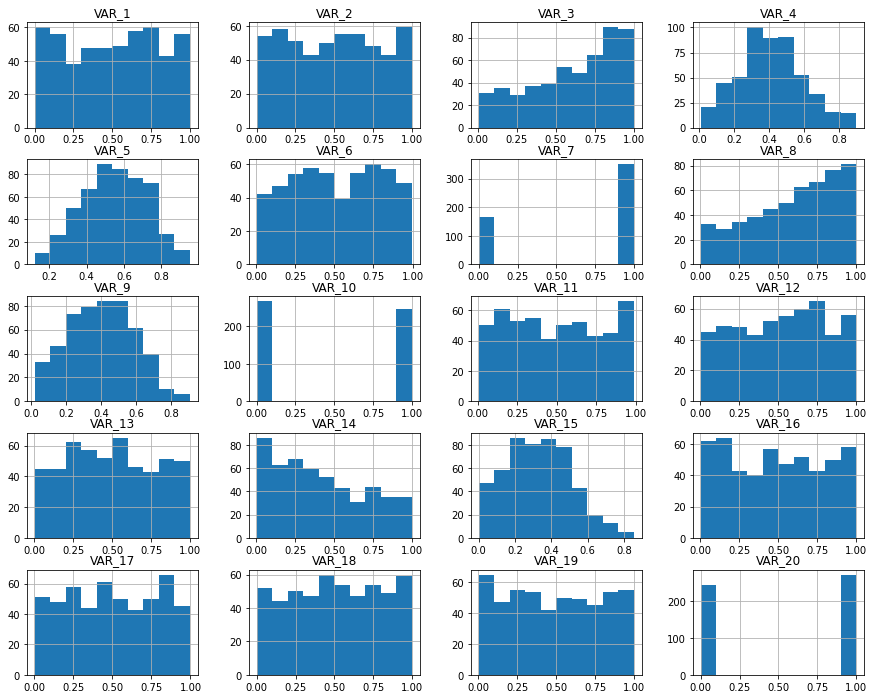

In [18]:
train_data[(train_data['Treatment']==1) & (train_data['Response']==1)][features].hist(figsize=(15,12)); # Persuadables

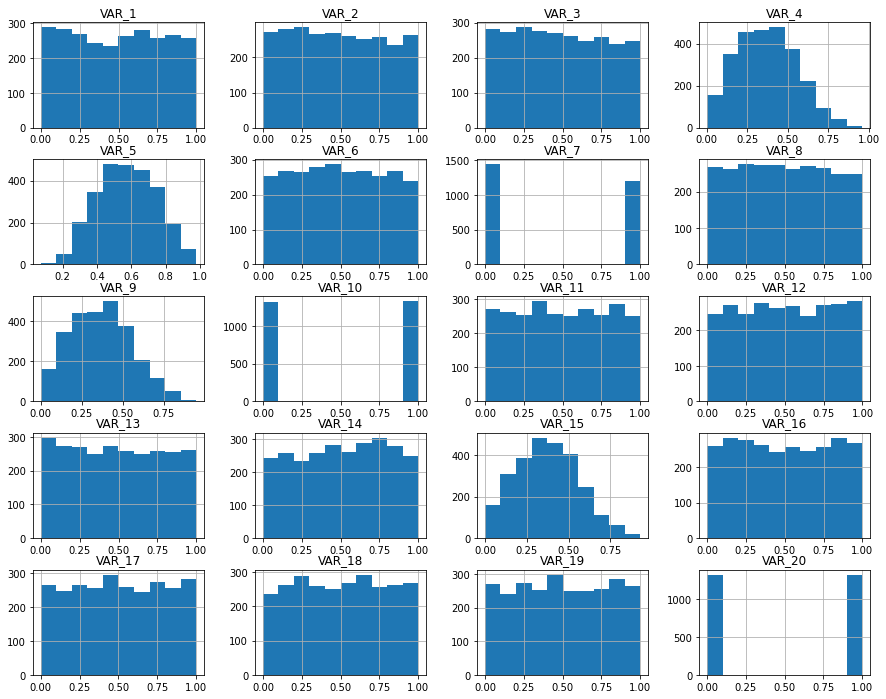

In [19]:
train_data[(train_data['Treatment']==1) & (train_data['Response']==0)][features].hist(figsize=(15,12)); # Do not disturbs

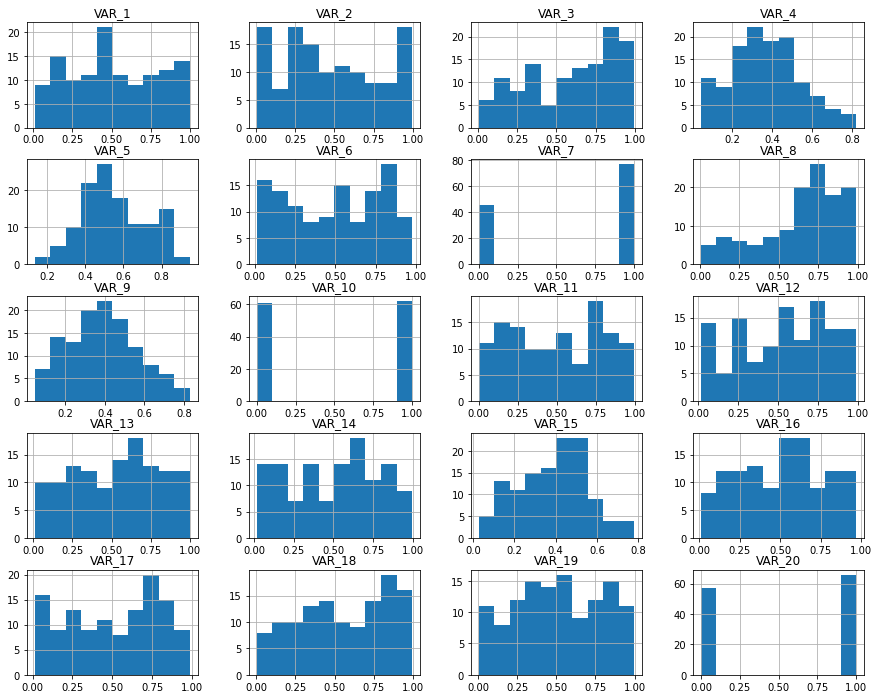

In [20]:
train_data[(train_data['Treatment']==0) & (train_data['Response']==1)][features].hist(figsize=(15,12));  # Sure things

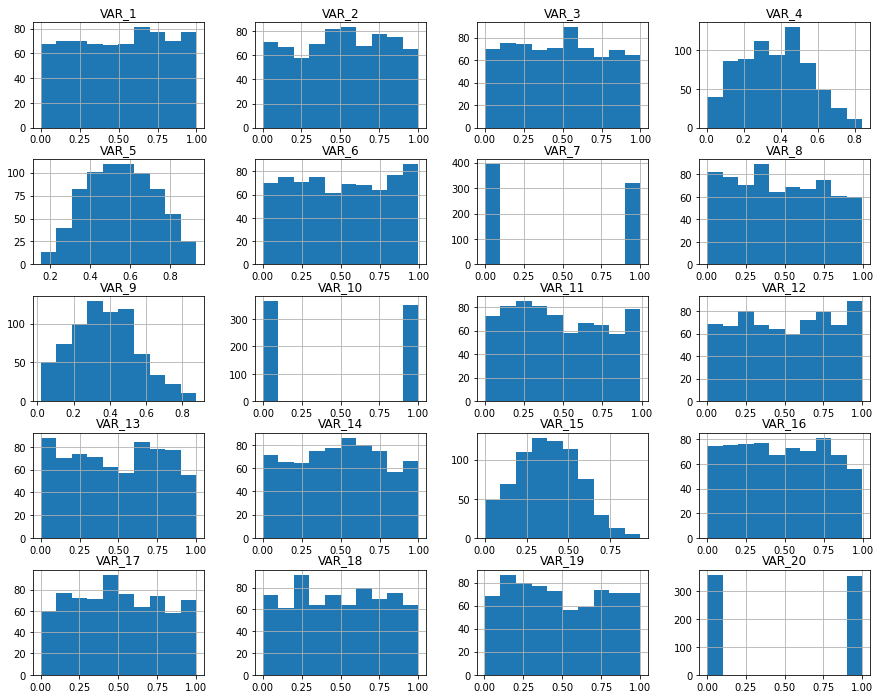

In [21]:
train_data[(train_data['Treatment']==0) & (train_data['Response']==0)][features].hist(figsize=(15,12));  # Lost causes

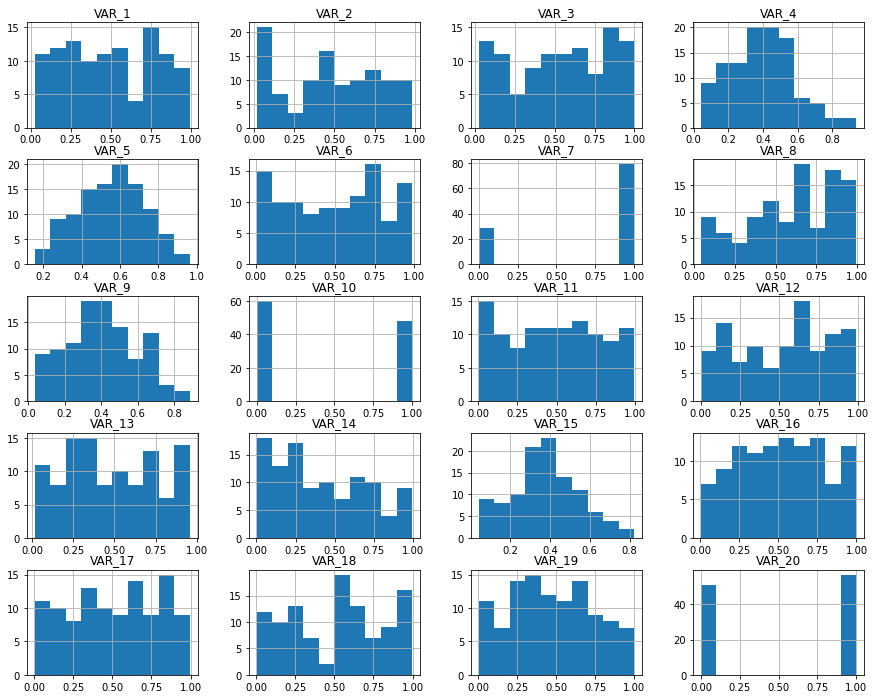

In [22]:
test_data[(test_data['Treatment']==1) & (test_data['Response']==1)][features].hist(figsize=(15,12));  # Persuadables

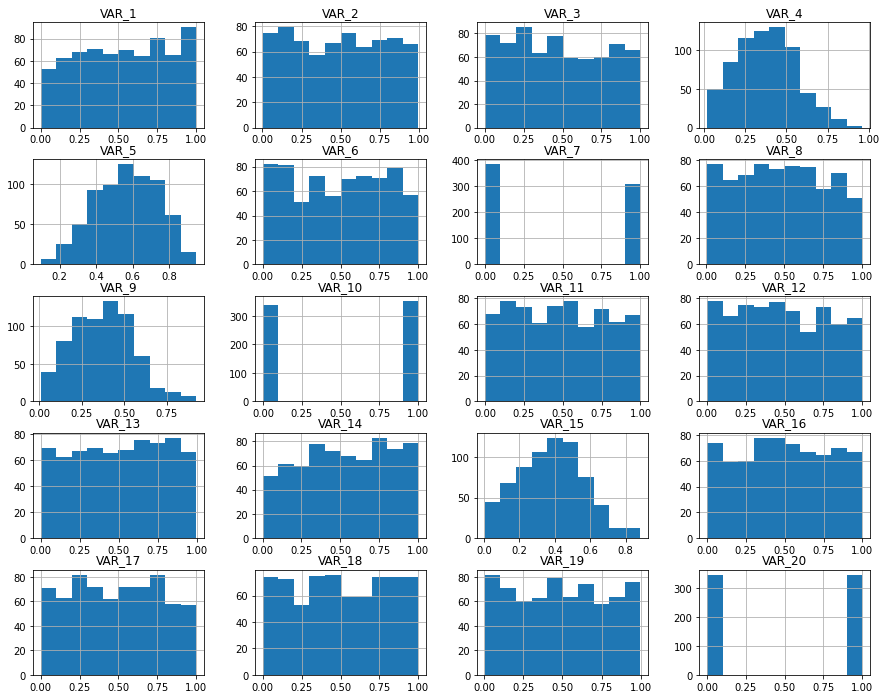

In [23]:
test_data[(test_data['Treatment']==1) & (test_data['Response']==0)][features].hist(figsize=(15,12));  # Do not disturbs

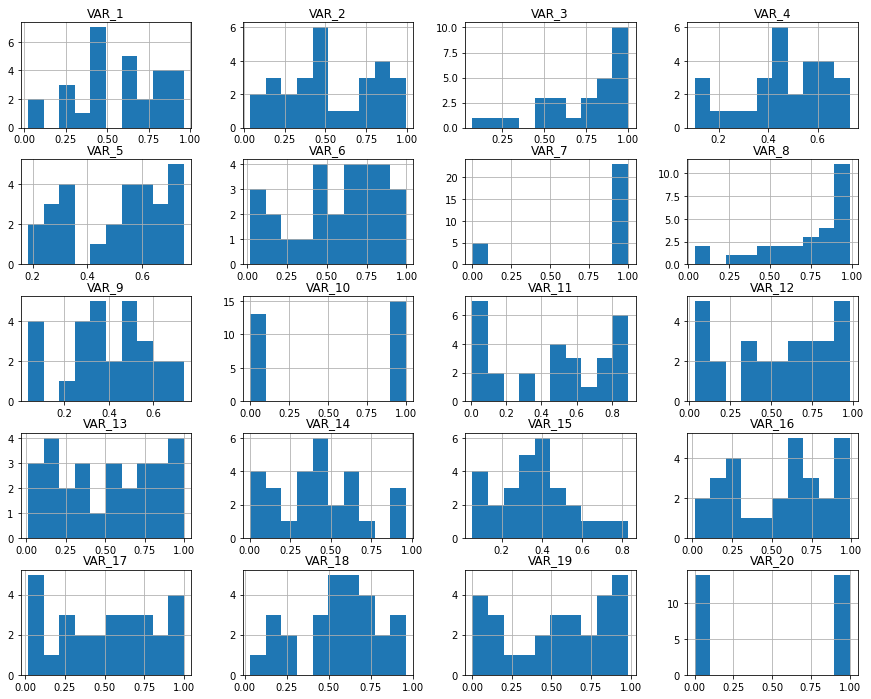

In [24]:
test_data[(test_data['Treatment']==0) & (test_data['Response']==1)][features].hist(figsize=(15,12)); # Sure things

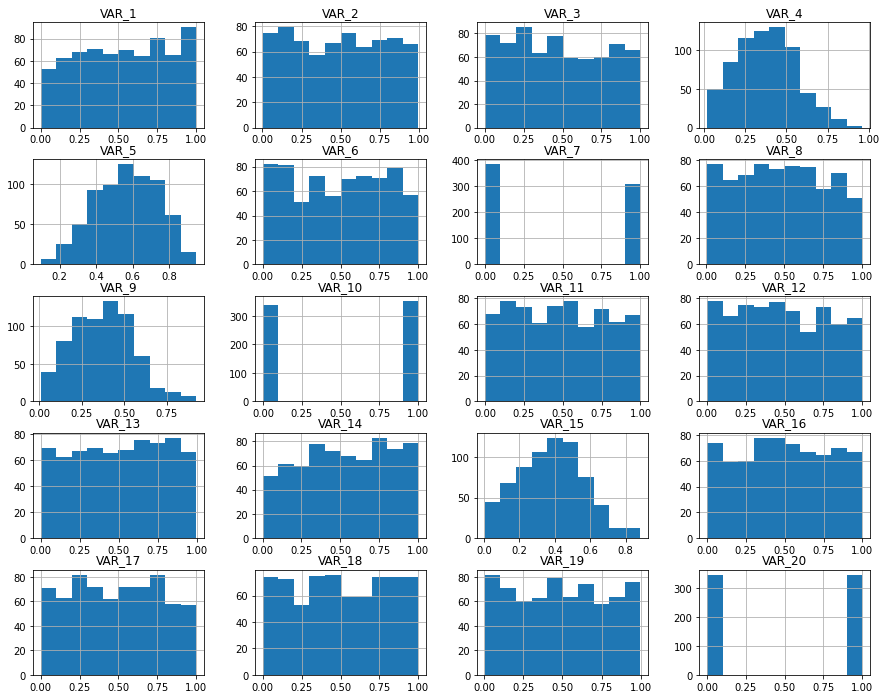

In [25]:
test_data[(test_data['Treatment']==1) & (test_data['Response']==0)][features].hist(figsize=(15,12)); # Lost causes

In [26]:
# This is our baseline model, where we send promotions to everyone
def promotion_strategy(df):
    test = df
    
    promotion = []
    
    num_test_points = test.shape[0]
    
    for i in range(num_test_points):
        promotion.append(1)
        
    promotion = np.array(promotion)
    
    return promotion

In [27]:
test_results(promotion_strategy)

Your irr with this strategy is -0.0041.

Your nir with this strategy is 680.15.

Telecoms corp's baseline model had an irr of 0.0188 and an nir of 189.45 on the test set.



(-0.004134521385562806, 680.15)

# **Model 1**

In [28]:
train_data

,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,VAR_11,VAR_12,VAR_13,VAR_14,VAR_15,VAR_16,VAR_17,VAR_18,VAR_19,VAR_20,Treatment,Response
0,0.269353,0.977062,0.179054,0.144099,0.488567,0.762235,1,0.978275,0.535037,1,0.366054,0.550901,0.000245,0.417245,0.275430,0.779592,0.493346,0.125137,0.429567,0,1,0
1,0.425480,0.323984,0.024392,0.479784,0.569530,0.868371,1,0.977735,0.159405,1,0.335243,0.721150,0.609608,0.808537,0.779295,0.357123,0.339322,0.977163,0.811942,0,0,1
2,0.030404,0.830881,0.142175,0.318910,0.752292,0.083491,1,0.557118,0.268049,0,0.569366,0.897666,0.748081,0.198890,0.205935,0.864149,0.402565,0.824356,0.819413,1,0,0
3,0.819759,0.265456,0.260631,0.199446,0.803753,0.729100,1,0.569136,0.100769,0,0.614078,0.866239,0.112927,0.107291,0.527564,0.100724,0.430298,0.938603,0.192437,1,1,0
4,0.743992,0.159823,0.879208,0.592267,0.473591,0.432078,0,0.356458,0.400888,1,0.982192,0.906042,0.401510,0.258004,0.370004,0.330591,0.562990,0.546856,0.885269,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.988969,0.624813,0.246548,0.425238,0.628861,0.767998,0,0.371861,0.257488,1,0.552685,0.725547,0.870904,0.527987,0.143533,0.132731,0.568597,0.508728,0.405572,0,1,0
3996,0.511534,0.484119,0.752265,0.419757,0.535814,0.927086,0,0.550849,0.018799,0,0.168238,0.528954,0.208098,0.736640,0.197265,0.909976,0.695133,0.464865,0.488507,0,0,0
3997,0.968537,0.643728,0.533350,0.282291,0.739330,0.511507,1,0.568850,0.347926,1,0.459460,0.491877,0.903969,0.528230,0.305398,0.863420,0.279405,0.299370,0.973667,1,1,0
3998,0.388078,0.241713,0.654643,0.075139,0.547798,0.380035,1,0.146865,0.046475,1,0.943152,0.538354,0.288556,0.586316,0.284953,0.812166,0.704730,0.164199,0.257781,0,1,0


In [29]:
# split data into train and valid
train, valid = sk.model_selection.train_test_split(train_data, test_size=0.2, random_state=42)

In [30]:
# generate features and labels
Y_train = train['Response']
X_train = train[features]

Y_valid = valid['Response']
X_valid = valid[features]

In [31]:
Y_train.value_counts()

0    2685
1     515
Name: Response, dtype: int64

In [32]:
Y_valid.value_counts()

0    676
1    124
Name: Response, dtype: int64

In [33]:
# Up sample only the train dataset with SMOTE
sm = SMOTE(random_state=42)
X_train_upsamp, Y_train_upsamp = sm.fit_resample(X_train, Y_train)
    
X_train_upsamp = pd.DataFrame(X_train_upsamp, columns=features)

Y_train_upsamp = pd.Series(Y_train_upsamp)

In [34]:
Y_train_upsamp.value_counts()

0    2685
1    2685
Name: Response, dtype: int64

In [35]:
# Train an xgboost model
eval_set = [(X_train_upsamp, Y_train_upsamp), (X_valid, Y_valid)]
model = xgb.XGBClassifier(learning_rate = 0.1,\
                          max_depth = 7,\
                          min_child_weight = 5,\
                          objective = 'binary:logistic',\
                          seed = 42,\
                          gamma = 0.1,\
                          silent = True)
model.fit(X_train_upsamp, Y_train_upsamp, eval_set=eval_set,\
          eval_metric="auc", verbose=True, early_stopping_rounds=30)

[0]	validation_0-auc:0.85836	validation_1-auc:0.604576
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.890409	validation_1-auc:0.598677
[2]	validation_0-auc:0.903211	validation_1-auc:0.598063
[3]	validation_0-auc:0.914608	validation_1-auc:0.601176
[4]	validation_0-auc:0.920802	validation_1-auc:0.605411
[5]	validation_0-auc:0.928693	validation_1-auc:0.609843
[6]	validation_0-auc:0.935054	validation_1-auc:0.610684
[7]	validation_0-auc:0.938961	validation_1-auc:0.606115
[8]	validation_0-auc:0.941064	validation_1-auc:0.61387
[9]	validation_0-auc:0.944891	validation_1-auc:0.612659
[10]	validation_0-auc:0.94793	validation_1-auc:0.61285
[11]	validation_0-auc:0.951063	validation_1-auc:0.613028
[12]	validation_0-auc:0.953491	validation_1-auc:0.613589
[13]	validation_0-auc:0.955824	validation_1-auc:0.613959
[14]	validation_0-auc:0.958718	validation_1-auc:0.612217
[1

XGBClassifier(gamma=0.1, max_depth=7, min_child_weight=5, seed=42, silent=True)

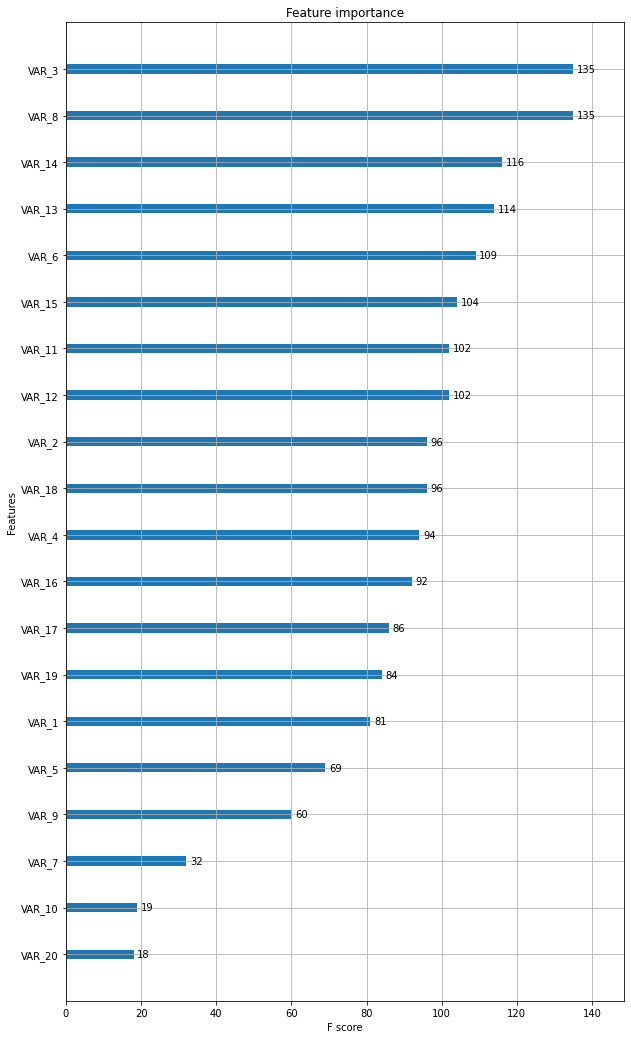

In [36]:
# Check which features are important

from xgboost import plot_importance
from matplotlib import pyplot

fig, ax = pyplot.subplots(figsize=(10, 18));
xgb.plot_importance(model, ax=ax);

we can see that the plot shows VAR_3 has the highest importance and VAR_20 has the lowest importance.

In [37]:
# Confusion marix for the validation set
valid_pred = model.predict(X_valid)
cm = sk.metrics.confusion_matrix
cm(Y_valid, valid_pred)

array([[540, 136],
       [ 76,  48]])

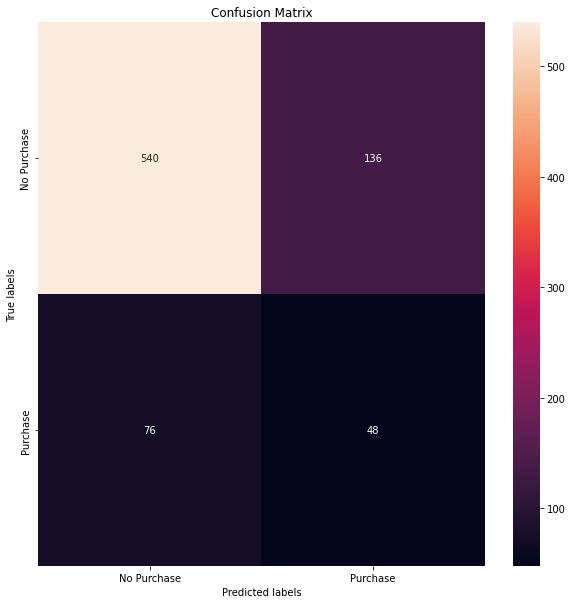

In [38]:
# Confusion marix for the validation set
valid_pred = model.predict(X_valid, ntree_limit=model.best_ntree_limit)
cm = sk.metrics.confusion_matrix(Y_valid, valid_pred)

fig, ax= plt.subplots(figsize=(10,10))
sb.heatmap(cm, annot=True, fmt='g', ax = ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['No Purchase', 'Purchase']); 
ax.yaxis.set_ticklabels(['No Purchase', 'Purchase']);

In [39]:
from sklearn.metrics import classification_report
report = classification_report(valid_pred, Y_valid)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       616
           1       0.39      0.26      0.31       184

    accuracy                           0.73       800
   macro avg       0.59      0.57      0.57       800
weighted avg       0.70      0.73      0.72       800



In [40]:
print(f'Train Accuracy - XGboost : {model.score(X_train_upsamp, Y_train_upsamp):.3f}')
print(f'Valid Accuracy : {model.score(X_valid, Y_valid):.3f}')

Train Accuracy - XGboost : 0.897
Valid Accuracy : 0.735


In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report, roc_curve
roc_auc_score(Y_train_upsamp, model.predict_proba(X_train_upsamp)[:, 1])

0.955824308438147

In [42]:
from sklearn.metrics import mean_squared_error
# Calculation of Mean Squared Error (MSE)
mean_squared_error(Y_valid,valid_pred)

0.265

In [43]:
train, valid = train_test_split(train_data, test_size=0.2, random_state=42)

In [44]:
# generate features and labels
Y_train = train['Response']
X_train = train[features+[treatment]]

Y_valid = valid['Response']
X_valid = valid[features+[treatment]]

In [45]:
# Up sample only the train dataset with SMOTE
sm = SMOTE(random_state=42)
X_train_upsamp, Y_train_upsamp = sm.fit_resample(X_train, Y_train)
    
X_train_upsamp = pd.DataFrame(X_train_upsamp)

Y_train_upsamp = pd.Series(Y_train_upsamp)

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score



parameters = {
            'clf__n_estimators': [50, 100, 200], # number of trees in forest
            'clf__min_samples_split': [2, 3, 4], # minimum number of samples required for split to occur
            'clf__max_depth' : [4,5,6], # maximum depth of the tree; min samples_split supercedes in cases where max_depth isn't sufficient
            'clf__bootstrap': [True, False] # determine whether whole dataset should be used to build each tree

    }
Grid_rf = GridSearchCV(pipeline, param_grid=parameters, cv=5, verbose=2, n_jobs=4)
Grid_rf.fit(X_train_upsamp, Y_train_upsamp)
Grid_rf.best_params_

In [47]:
pipeline = Pipeline([('clf', RandomForestClassifier())])
parameters = {
            'clf__n_estimators': [50, 100, 200], # number of trees in forest
            'clf__min_samples_split': [2, 3, 4], # minimum number of samples required for split to occur
            'clf__max_depth' : [4,5,6], # maximum depth of the tree; min samples_split supercedes in cases where max_depth isn't sufficient
            'clf__bootstrap': [True, False] # determine whether whole dataset should be used to build each tree

    }
Grid_rf = GridSearchCV(pipeline, param_grid=parameters, cv=5, verbose=2, n_jobs=4)
Grid_rf.fit(X_train_upsamp, Y_train_upsamp)
Grid_rf.best_params_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


{'clf__bootstrap': True,
 'clf__max_depth': 6,
 'clf__min_samples_split': 3,
 'clf__n_estimators': 100}

In [94]:
import dill

with open("Grid_rf.dill", 'wb') as f:
    dill.dump(Grid_rf, f)

In [95]:
resp_pred = Grid_rf.predict(test_data[features+[treatment]])

In [96]:
resp_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,

In [97]:
test_data[target]

0      0
1      0
2      1
3      0
4      1
      ..
995    1
996    0
997    0
998    0
999    0
Name: Response, Length: 1000, dtype: int64

In [98]:
with open("model.dill", 'wb') as m:
    dill.dump(model, m)

In [100]:
xgb_pred = model.predict(test_data[features])

In [101]:
xgb_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [102]:
test_data[target]

0      0
1      0
2      1
3      0
4      1
      ..
995    1
996    0
997    0
998    0
999    0
Name: Response, Length: 1000, dtype: int64

In [103]:
from sklearn.metrics import mean_squared_error
# Calculation of Mean Squared Error (MSE)
mean_squared_error(test_data[target],xgb_pred)

0.203

In [104]:
mean_squared_error(test_data[target],resp_pred)

0.19

In [105]:
with open("grid_svm.dill", 'wb') as s:
    dill.dump(grid_svm, s)

In [107]:
svm_pred = grid_svm.predict(test_data[features+[treatment]])

In [108]:
svm_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [109]:
mean_squared_error(test_data[target],svm_pred)

0.151

In [48]:
clf = RandomForestClassifier(bootstrap = True,
                             max_depth = 6,
                             min_samples_split= 3,
                             n_estimators = 50,
                             class_weight = 'balanced')

In [49]:
clf.fit(X_train_upsamp, Y_train_upsamp)

RandomForestClassifier(class_weight='balanced', max_depth=6,
                       min_samples_split=3, n_estimators=50)

In [50]:
valid_pred_rf = clf.predict(X_valid)
cm = sk.metrics.confusion_matrix
cm(Y_valid, valid_pred_rf)

array([[571, 105],
       [ 77,  47]])

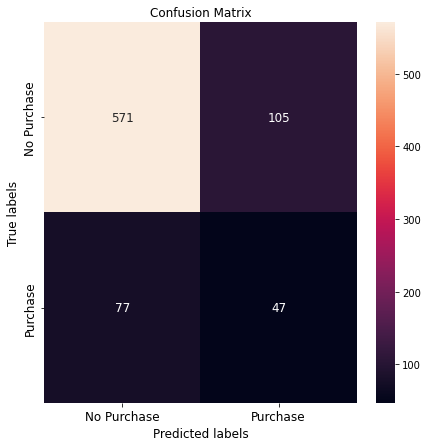

In [51]:
# Confusion marix for the validation set
cm = sk.metrics.confusion_matrix(Y_valid, valid_pred_rf)

fig, ax= plt.subplots(figsize=(7,7))
sb.heatmap(cm, annot_kws={'size': 12}, annot=True, fmt='g', ax = ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=12);
ax.set_ylabel('True labels', fontsize=12); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['No Purchase', 'Purchase'], fontsize=12); 
ax.yaxis.set_ticklabels(['No Purchase', 'Purchase'], fontsize=12);

In [52]:
report = classification_report(valid_pred_rf, Y_valid)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       648
           1       0.38      0.31      0.34       152

    accuracy                           0.77       800
   macro avg       0.61      0.60      0.60       800
weighted avg       0.76      0.77      0.76       800



In [53]:
pipeline = Pipeline([('clf', RandomForestClassifier())])

parameters = {
            'clf__n_estimators': np.linspace(2, 200, 500, dtype = "int"), # number of trees in forest
            'clf__min_samples_split': np.linspace(2, 50, 100, dtype = "int"), # minimum number of samples required for split to occur
            'clf__max_depth' : [5, 20, 30, None], # maximum depth of the tree; min samples_split supercedes in cases where max_depth isn't sufficient
            'clf__max_features': ["sqrt", "log2",10, 20, None],
            'clf__oob_score': [True],
            'clf__bootstrap': [True]# determine whether whole dataset should be used to build each tree

    }
scoreFunction = {'precision', 'recall', 'accuracy'}   
Rand_rf = RandomizedSearchCV(pipeline,
                            param_distributions = parameters, 
                            n_iter = 20,
                            scoring = scoreFunction,               
                            refit = "precision",
                            return_train_score = True,
                            random_state = 42,
                            cv = 5,
                            verbose = 2)
Rand_rf.fit(X_train_upsamp, Y_train_upsamp)
Rand_rf.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END clf__bootstrap=True, clf__max_depth=5, clf__max_features=10, clf__min_samples_split=22, clf__n_estimators=183, clf__oob_score=True; total time=   3.1s
[CV] END clf__bootstrap=True, clf__max_depth=5, clf__max_features=10, clf__min_samples_split=22, clf__n_estimators=183, clf__oob_score=True; total time=   3.0s
[CV] END clf__bootstrap=True, clf__max_depth=5, clf__max_features=10, clf__min_samples_split=22, clf__n_estimators=183, clf__oob_score=True; total time=   3.0s
[CV] END clf__bootstrap=True, clf__max_depth=5, clf__max_features=10, clf__min_samples_split=22, clf__n_estimators=183, clf__oob_score=True; total time=   3.0s
[CV] END clf__bootstrap=True, clf__max_depth=5, clf__max_features=10, clf__min_samples_split=22, clf__n_estimators=183, clf__oob_score=True; total time=   3.0s
[CV] END clf__bootstrap=True, clf__max_depth=30, clf__max_features=20, clf__min_samples_split=22, clf__n_estimators=63, clf__oob_score=Tru

{'clf__bootstrap': True,
 'clf__max_depth': 20,
 'clf__max_features': 'sqrt',
 'clf__min_samples_split': 10,
 'clf__n_estimators': 72,
 'clf__oob_score': True}

In [54]:
Rand_rf = RandomForestClassifier(bootstrap= True,
                                 max_depth= 20,
                                 max_features= 'sqrt',
                                 min_samples_split= 10,
                                 n_estimators= 72,
                                 oob_score= True,
                                 class_weight= 'balanced')

In [55]:
Rand_rf.fit(X_train_upsamp, Y_train_upsamp)

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       max_features='sqrt', min_samples_split=10,
                       n_estimators=72, oob_score=True)

In [56]:
pred_rf_rand = Rand_rf.predict(X_valid)
cm = sk.metrics.confusion_matrix
cm(Y_valid, pred_rf_rand)

array([[617,  59],
       [ 90,  34]])

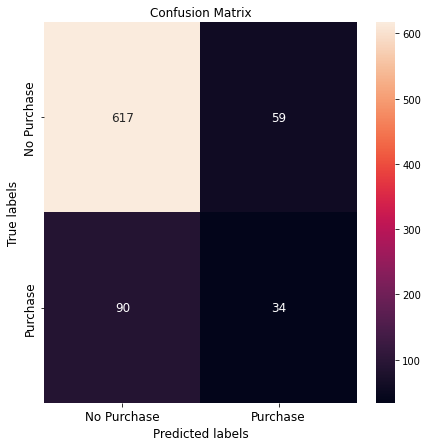

In [57]:
# Confusion marix for the validation set
cm = sk.metrics.confusion_matrix(Y_valid, pred_rf_rand)

fig, ax= plt.subplots(figsize=(7,7))
sb.heatmap(cm, annot_kws={'size': 12}, annot=True, fmt='g', ax = ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=12);
ax.set_ylabel('True labels', fontsize=12); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['No Purchase', 'Purchase'], fontsize=12); 
ax.yaxis.set_ticklabels(['No Purchase', 'Purchase'], fontsize=12);

In [58]:
y_val_probabilities = Rand_rf.predict_proba(X_valid)
# y_test probabilities has shape = [n_samples, n_classes]
#y_val_predictions_high_precision = y_val probabilities[:,1]
y_val_predictions_high_recall = y_val_probabilities[:, 1] > 0.2

In [59]:
report = classification_report(pred_rf_rand, Y_valid)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       707
           1       0.27      0.37      0.31        93

    accuracy                           0.81       800
   macro avg       0.59      0.62      0.60       800
weighted avg       0.84      0.81      0.82       800



In [60]:
report2 = classification_report(y_val_predictions_high_recall, Y_valid)
print(report2)

              precision    recall  f1-score   support

       False       0.17      0.88      0.29       131
        True       0.87      0.16      0.27       669

    accuracy                           0.28       800
   macro avg       0.52      0.52      0.28       800
weighted avg       0.76      0.28      0.27       800



In [61]:
tn = cm[:1,0]
fp = cm[:1,1]
fn = cm[1, :1]
tp = cm[1,1:]

sensitivity = tp/(tp+fn)
specificity = tn/(fp+tn)
print('sensitivity :', sensitivity.round(2))
print ('specificity :', specificity.round(2))

sensitivity : [0.27]
specificity : [0.91]


In [62]:
train_pred = Rand_rf.predict_proba(X_train_upsamp)[:,1]

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report, roc_curve
roc_auc = roc_auc_score(Y_train_upsamp, train_pred)
roc_auc

0.9996884547229418

In [64]:
#report = classification_report(train_pred, Y_valid)
#print(report)

Text(0.5, 1.0, 'ROC curve')

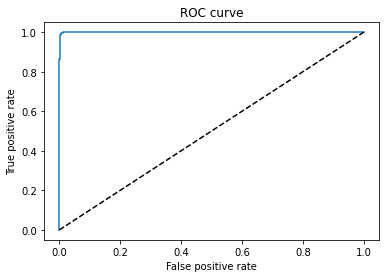

In [65]:
#get the values required to plot a ROC curve
fpr, tpr, thresholds= roc_curve(Y_train_upsamp, train_pred) #predictions
plt.plot(fpr, tpr)
# plot a secondary diagonal line, with dashed Line style and black color to represent a no-skill classifier
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [66]:
print(f'Train Accuracy : {Grid_rf.score(X_train_upsamp, Y_train_upsamp):.3f}')
print(f'Valid Accuracy : {Grid_rf.score(X_valid, Y_valid):.3f}')

Train Accuracy : 0.815
Valid Accuracy : 0.792


In [67]:
Y_train_pred =Grid_rf.predict(X_train_upsamp)

In [68]:
from sklearn.metrics import mean_squared_error
# Calculation of Mean Squared Error (MSE)
mean_squared_error(Y_valid,pred_rf_rand)

0.18625

In [69]:
mean_squared_error(Y_train_upsamp,Y_train_pred)

0.18547486033519553

In [70]:
print(f'Train Accuracy - RF : {clf.score(X_train_upsamp, Y_train_upsamp):.3f}')
print(f'Valid Accuracy - RF : {clf.score(X_valid, Y_valid):.3f}')

Train Accuracy - RF : 0.806
Valid Accuracy - RF : 0.772


In [71]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_train_upsamp, Grid_rf.predict_proba(X_train_upsamp)[:, 1])

0.9218533198783501

In [72]:
print(f'Train Accuracy - Randomize : {Rand_rf.score(X_train_upsamp, Y_train_upsamp):.3f}')
print(f'Valid Accuracy - Randomize : {Rand_rf.score(X_valid, Y_valid):.3f}')

Train Accuracy - Randomize : 0.994
Valid Accuracy - Randomize : 0.814


In [73]:
Y_train_pred =Rand_rf.predict(X_train_upsamp)

In [74]:
mean_squared_error(Y_train_upsamp,Y_train_pred)

0.00633147113594041

In [75]:
Y_train_pred =Rand_rf.predict(X_valid)

In [76]:
mean_squared_error(Y_valid,Y_train_pred)

0.18625

In [77]:
test_data.shape

(1000, 22)

In [78]:
test_pred_rf = Rand_rf.predict(test_data[features+[treatment]])
test_pred_rf

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,

In [79]:
pred_test = pd.DataFrame(test_pred_rf, columns=['Prediction']).reset_index(inplace=False)

In [80]:
pred_test

,index,Prediction
0,0,0
1,1,0
2,2,0
3,3,1
4,4,0
...,...,...
995,995,0
996,996,0
997,997,0
998,998,0


In [81]:
test_df = pd.DataFrame(test_data[target])
test_df

,Response
0,0
1,0
2,1
3,0
4,1
...,...
995,1
996,0
997,0
998,0


In [82]:
from sklearn.metrics import mean_squared_error
# Calculation of Mean Squared Error (MSE)
mean_squared_error(test_df,pred_test['Prediction'])

0.152

In [83]:
from sklearn.svm import SVC  
svc = SVC() 

In [84]:
 parameters = {'kernel':('linear', 'rbf'), 'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

In [85]:
grid_svm = GridSearchCV(svc, parameters, refit = True, verbose = 3)

In [86]:
grid_svm.fit(X_train_upsamp, Y_train_upsamp)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.637 total time=   0.7s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.652 total time=   0.7s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.631 total time=   0.7s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.671 total time=   0.7s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.667 total time=   0.7s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.696 total time=   1.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.785 total time=   1.4s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.757 total time=   1.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.776 total time=   1.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.782 total time=   1.4s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.637 total time=   0.7s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ('linear', 'rbf')},
             verbose=3)

In [87]:
# print best parameter after tuning
print(grid_svm.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid_svm.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, gamma=1)


In [88]:
valid_pred_svm = grid_svm.predict(X_valid)
cm = sk.metrics.confusion_matrix
cm(Y_valid, valid_pred_svm)

array([[636,  40],
       [ 94,  30]])

In [89]:
report = classification_report(valid_pred_svm, Y_valid)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       730
           1       0.24      0.43      0.31        70

    accuracy                           0.83       800
   macro avg       0.59      0.65      0.61       800
weighted avg       0.88      0.83      0.85       800



In [90]:
grid_predictions = grid_svm.predict(X_valid)
 
# print classification report
print(classification_report(Y_valid, valid_pred_svm))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       676
           1       0.43      0.24      0.31       124

    accuracy                           0.83       800
   macro avg       0.65      0.59      0.61       800
weighted avg       0.80      0.83      0.81       800



In [91]:
print(f'Train Accuracy - SVM : {grid_svm.score(X_train_upsamp, Y_train_upsamp):.3f}')
print(f'Valid Accuracy - SVM : {grid_svm.score(X_valid, Y_valid):.3f}')

Train Accuracy - SVM : 1.000
Valid Accuracy - SVM : 0.833


In [92]:
mean_squared_error(Y_valid,valid_pred_svm)

0.1675

In [134]:
test_data_sheet = pd.read_excel('drive/MyDrive/Colab Notebooks/XL AA Interview - Data.xlsx', sheet_name = "Test Data")

In [135]:
test_data_sheet.head()

,Customer_No,Campaign_ID,Treatment,Response,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,VAR_11,VAR_12,VAR_13,VAR_14,VAR_15,VAR_16,VAR_17,VAR_18,VAR_19,VAR_20
0,5001,1,1,NaN,0.686796,0.952192,0.144323,0.039910,0.694265,0.572308,0,0.014429,0.487997,1,0.681588,0.288802,0.996064,0.996291,0.896249,0.337743,0.328846,0.302670,0.324479,1
1,5002,1,1,NaN,0.672283,0.309733,0.107556,0.380038,0.707459,0.353799,1,0.553926,0.167782,0,0.593223,0.587643,0.116407,0.034851,0.341741,0.576397,0.367817,0.486987,0.470469,1
2,5003,1,1,NaN,0.462260,0.768436,0.316545,0.252088,0.563037,0.504089,1,0.482045,0.034055,1,0.090207,0.498391,0.554757,0.891667,0.453819,0.129818,0.593806,0.027472,0.017755,1
3,5004,1,1,NaN,0.021992,0.870394,0.927347,0.226174,0.557046,0.528577,0,0.464168,0.054325,0,0.538758,0.144268,0.811103,0.802228,0.500852,0.051405,0.240928,0.901543,0.574290,1
4,5005,1,1,NaN,0.309676,0.932408,0.784479,0.687652,0.353095,0.156347,1,0.919176,0.652705,1,0.804107,0.533339,0.288063,0.833480,0.653980,0.209881,0.306384,0.011995,0.176311,1


In [137]:
test_var = test_data_sheet[features+[treatment]]
test_data_predict = Grid_rf.predict(test_var)

In [138]:
test_data_predict 

array([0, 1, 0, ..., 0, 0, 0])

In [147]:
test_data_df = pd.DataFrame(test_data_predict, columns=['Response']).reset_index(inplace=False)

In [148]:
test_data_df

,index,Response
0,0,0
1,1,1
2,2,0
3,3,0
4,4,1
...,...,...
4995,4995,0
4996,4996,0
4997,4997,0
4998,4998,0


In [149]:
test_data_df.groupby('Response')['index'].count()

Response
0    3980
1    1020
Name: index, dtype: int64

In [151]:
1020/5000

0.204

In [152]:
test_data_df.to_excel('drive/MyDrive/Colab Notebooks/predict_test.xlsx', index=False)

In [110]:
df.head()

,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,VAR_11,VAR_12,VAR_13,VAR_14,VAR_15,VAR_16,VAR_17,VAR_18,VAR_19,VAR_20,Treatment,Response
0,0.687498,0.875153,0.008258,0.104846,0.923085,0.389724,0,0.601138,0.383264,0,0.623378,0.664762,0.421897,0.792814,0.256909,0.162140,0.790612,0.750691,0.574619,1,1,0
1,0.803111,0.486645,0.875048,0.178888,0.787625,0.160693,1,0.540208,0.234801,1,0.761690,0.472379,0.944845,0.331881,0.210738,0.611081,0.549276,0.179801,0.433172,1,1,1
2,0.611812,0.339746,0.470729,0.661294,0.466377,0.665199,0,0.991736,0.163761,1,0.933846,0.327720,0.372890,0.575293,0.757852,0.002344,0.208289,0.760725,0.351247,0,1,0
3,0.334324,0.686310,0.570324,0.516624,0.449102,0.327000,0,0.767498,0.299516,0,0.286490,0.055919,0.411782,0.992843,0.656838,0.076548,0.027267,0.875874,0.903338,0,1,0
4,0.989999,0.847866,0.179484,0.414471,0.520857,0.275867,0,0.645115,0.527084,0,0.173448,0.588752,0.681931,0.704829,0.597112,0.100747,0.787324,0.933161,0.893119,0,1,0


In [111]:
df.shape

(5000, 22)

In [112]:

ntree_limit=model.best_ntree_limit
ntree_limit

14

In [113]:
def promotion_strategy(df):
    test = df
    
    preds = model.predict(test)

    promotion = []
    for pred in preds:
        if pred == 1:
            promotion.append(1)
        else:
            promotion.append(0)
    promotion = np.array(promotion)
    return promotion

In [114]:
valid_results(promotion_strategy, valid)  # Calculate IRR and NIR for validation set

Your irr with this strategy is 0.1517.

Your nir with this strategy is 357.80.
Telecoms corps baseline model had an irr of 0.0188 and an nir of 189.45 on the test set.


(0.15165165165165162, 357.8)

In [115]:
test_results(promotion_strategy)  # Calculate IRR and NIR for test set

Your irr with this strategy is -0.1506.

Your nir with this strategy is 266.45.

Telecoms corp's baseline model had an irr of 0.0188 and an nir of 189.45 on the test set.



(-0.15063694267515926, 266.45)

# **Model 2**

In [116]:
target = []
for index, row in train_data.iterrows():
    if (row['Treatment'] == 1) & (row['Response'] == 1):
        # TR group (Treatment and Response group) --> Persuadables
        target.append(0)
    elif (row['Treatment'] == 0) & (row['Response'] == 1):
        # CR group (Control and Response group) --> The sure shots
        target.append(1)
    elif (row['Treatment'] == 1) & (row['Response'] == 0):
        # TN group (Treatment and No response group) --> The Do Not Disturbs
        target.append(2)
    else: #CN group (Control and No response group) --> The lost causes
        target.append(3)

train_data['target'] = target
train_data

,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,VAR_11,VAR_12,VAR_13,VAR_14,VAR_15,VAR_16,VAR_17,VAR_18,VAR_19,VAR_20,Treatment,Response,target
0,0.269353,0.977062,0.179054,0.144099,0.488567,0.762235,1,0.978275,0.535037,1,0.366054,0.550901,0.000245,0.417245,0.275430,0.779592,0.493346,0.125137,0.429567,0,1,0,2
1,0.425480,0.323984,0.024392,0.479784,0.569530,0.868371,1,0.977735,0.159405,1,0.335243,0.721150,0.609608,0.808537,0.779295,0.357123,0.339322,0.977163,0.811942,0,0,1,1
2,0.030404,0.830881,0.142175,0.318910,0.752292,0.083491,1,0.557118,0.268049,0,0.569366,0.897666,0.748081,0.198890,0.205935,0.864149,0.402565,0.824356,0.819413,1,0,0,3
3,0.819759,0.265456,0.260631,0.199446,0.803753,0.729100,1,0.569136,0.100769,0,0.614078,0.866239,0.112927,0.107291,0.527564,0.100724,0.430298,0.938603,0.192437,1,1,0,2
4,0.743992,0.159823,0.879208,0.592267,0.473591,0.432078,0,0.356458,0.400888,1,0.982192,0.906042,0.401510,0.258004,0.370004,0.330591,0.562990,0.546856,0.885269,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.988969,0.624813,0.246548,0.425238,0.628861,0.767998,0,0.371861,0.257488,1,0.552685,0.725547,0.870904,0.527987,0.143533,0.132731,0.568597,0.508728,0.405572,0,1,0,2
3996,0.511534,0.484119,0.752265,0.419757,0.535814,0.927086,0,0.550849,0.018799,0,0.168238,0.528954,0.208098,0.736640,0.197265,0.909976,0.695133,0.464865,0.488507,0,0,0,3
3997,0.968537,0.643728,0.533350,0.282291,0.739330,0.511507,1,0.568850,0.347926,1,0.459460,0.491877,0.903969,0.528230,0.305398,0.863420,0.279405,0.299370,0.973667,1,1,0,2
3998,0.388078,0.241713,0.654643,0.075139,0.547798,0.380035,1,0.146865,0.046475,1,0.943152,0.538354,0.288556,0.586316,0.284953,0.812166,0.704730,0.164199,0.257781,0,1,0,2


In [117]:
train_data.target.value_counts()

2    2645
3     716
0     516
1     123
Name: target, dtype: int64

In [118]:
train, valid = sk.model_selection.train_test_split(train_data, test_size=0.2,random_state=42)

features = ['VAR_1', 'VAR_2', 'VAR_3', 'VAR_4', 'VAR_5',
       'VAR_6', 'VAR_7', 'VAR_8', 'VAR_9', 'VAR_10', 'VAR_11', 'VAR_12',
       'VAR_13', 'VAR_14', 'VAR_15', 'VAR_16', 'VAR_17', 'VAR_18', 'VAR_19',
       'VAR_20']

Y_train = train['target']
X_train = train[features]

Y_valid = valid['target']
X_valid = valid[features]

In [119]:
Y_train.value_counts()

2    2140
3     545
0     408
1     107
Name: target, dtype: int64

In [120]:

Y_valid.value_counts()

2    505
3    171
0    108
1     16
Name: target, dtype: int64

In [121]:
# up sample with SMOTE
sm = SMOTE({0:2140, 1:2140, 2:2140, 3:2140}, random_state=42)
X_train_upsamp, Y_train_upsamp = sm.fit_resample(X_train, Y_train)
    
X_train_upsamp = pd.DataFrame(X_train_upsamp, columns=features)

Y_train_upsamp = pd.Series(Y_train_upsamp)
Y_train_upsamp.value_counts()

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy={0: 2140, 1: 2140, 2: 2140, 3: 2140} as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


2    2140
0    2140
1    2140
3    2140
Name: target, dtype: int64

In [122]:
eval_set = [(X_train_upsamp, Y_train_upsamp), (X_valid, Y_valid)]
model2 = xgb.XGBClassifier()
model2.fit(X_train_upsamp, Y_train_upsamp, eval_set=eval_set,\
                    eval_metric="mlogloss", verbose=True, early_stopping_rounds=30)

[0]	validation_0-mlogloss:1.36774	validation_1-mlogloss:1.37608
Multiple eval metrics have been passed: 'validation_1-mlogloss' will be used for early stopping.

Will train until validation_1-mlogloss hasn't improved in 30 rounds.
[1]	validation_0-mlogloss:1.35162	validation_1-mlogloss:1.36799
[2]	validation_0-mlogloss:1.33691	validation_1-mlogloss:1.36005
[3]	validation_0-mlogloss:1.32362	validation_1-mlogloss:1.3556
[4]	validation_0-mlogloss:1.31054	validation_1-mlogloss:1.34909
[5]	validation_0-mlogloss:1.29906	validation_1-mlogloss:1.3435
[6]	validation_0-mlogloss:1.2883	validation_1-mlogloss:1.33901
[7]	validation_0-mlogloss:1.27865	validation_1-mlogloss:1.3338
[8]	validation_0-mlogloss:1.26943	validation_1-mlogloss:1.32956
[9]	validation_0-mlogloss:1.26052	validation_1-mlogloss:1.32649
[10]	validation_0-mlogloss:1.25244	validation_1-mlogloss:1.32445
[11]	validation_0-mlogloss:1.2441	validation_1-mlogloss:1.32151
[12]	validation_0-mlogloss:1.2366	validation_1-mlogloss:1.31817
[13]

XGBClassifier(objective='multi:softprob')

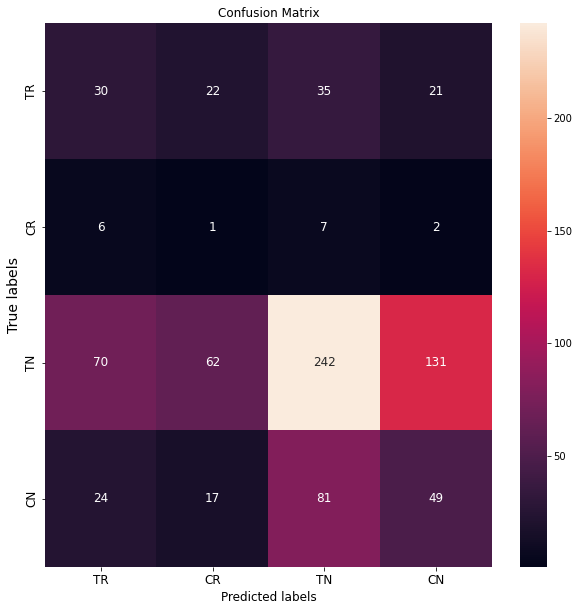

In [123]:
# confusion marix for the validation set
# Note:
# TR: treatment and respond group (received promotion and made purchase)
# CR: control and respond group (did not receive promotion but made purchase)
# TN: treatment and no respond group (received promotion but did not made purchase)
# CR: control and no respond group (did not receive promotion and made no purchase)
valid_pred = model2.predict(X_valid)
cm = sk.metrics.confusion_matrix(Y_valid, valid_pred)

fig, ax= plt.subplots(figsize=(10,10))
sb.heatmap(cm, annot_kws={'size': 12}, annot=True, fmt='g', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=12);
ax.set_ylabel('True labels', fontsize=14); 
ax.set_title('Confusion Matrix', fontsize=12); 
ax.xaxis.set_ticklabels(['TR', 'CR', 'TN', 'CN'], fontsize=12); 
ax.yaxis.set_ticklabels(['TR', 'CR', 'TN', 'CN'], fontsize=12);

In [124]:
report = classification_report(valid_pred, Y_valid)
print(report)

              precision    recall  f1-score   support

           0       0.28      0.23      0.25       130
           1       0.06      0.01      0.02       102
           2       0.48      0.66      0.56       365
           3       0.29      0.24      0.26       203

    accuracy                           0.40       800
   macro avg       0.28      0.29      0.27       800
weighted avg       0.34      0.40      0.36       800



In [125]:
clf2 = RandomForestClassifier(bootstrap = False,
                             max_depth = 6,
                             min_samples_split= 4,
                             n_estimators = 200)

In [126]:
clf2.fit(X_train_upsamp, Y_train_upsamp)

RandomForestClassifier(bootstrap=False, max_depth=6, min_samples_split=4,
                       n_estimators=200)

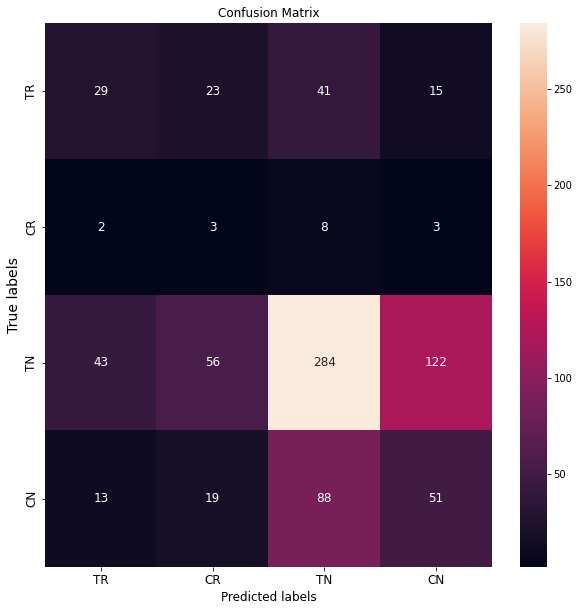

In [127]:
valid_pred_rf2 = clf2.predict(X_valid)
cm = sk.metrics.confusion_matrix(Y_valid, valid_pred_rf2)

fig, ax= plt.subplots(figsize=(10,10))
sb.heatmap(cm, annot_kws={'size': 12}, annot=True, fmt='g', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=12);
ax.set_ylabel('True labels', fontsize=14); 
ax.set_title('Confusion Matrix', fontsize=12); 
ax.xaxis.set_ticklabels(['TR', 'CR', 'TN', 'CN'], fontsize=12); 
ax.yaxis.set_ticklabels(['TR', 'CR', 'TN', 'CN'], fontsize=12);

In [128]:
report = classification_report(valid_pred_rf2, Y_valid)
print(report)

              precision    recall  f1-score   support

           0       0.27      0.33      0.30        87
           1       0.19      0.03      0.05       101
           2       0.56      0.67      0.61       421
           3       0.30      0.27      0.28       191

    accuracy                           0.46       800
   macro avg       0.33      0.33      0.31       800
weighted avg       0.42      0.46      0.43       800



In [129]:
print(f'Train Accuracy - Random Forest : {clf2.score(X_train_upsamp, Y_train_upsamp):.3f}')
print(f'Valid Accuracy : {clf2.score(X_valid, Y_valid):.3f}')

Train Accuracy - Random Forest : 0.722
Valid Accuracy : 0.459


In [130]:
print(f'Train Accuracy - XGboost : {model2.score(X_train_upsamp, Y_train_upsamp):.3f}')
print(f'Valid Accuracy : {model2.score(X_valid, Y_valid):.3f}')

Train Accuracy - XGboost : 0.689
Valid Accuracy : 0.403


In [131]:
def promotion_strategy(df):
    test = df
    
    pred = model2.predict(test)
    
    promotion = []
    
    for pred in pred:
        if pred == 0:
            promotion.append(1)
        else:
            promotion.append(0)
    
    promotion = np.array(promotion)
    
    return promotion

In [132]:
# find out IRR and NIR on our validation set
valid_results(promotion_strategy, valid)

Your irr with this strategy is 0.1000.

Your nir with this strategy is 225.00.
Telecoms corps baseline model had an irr of 0.0188 and an nir of 189.45 on the test set.


(0.09999999999999998, 225.0)

In [133]:
test_results(promotion_strategy)

Your irr with this strategy is -0.0895.

Your nir with this strategy is 231.85.

Telecoms corp's baseline model had an irr of 0.0188 and an nir of 189.45 on the test set.



(-0.08945065629557608, 231.85000000000002)